# Uncertainty analysis

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




from SALib.analyze import sobol

from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    perform_experiments,
    Samplers
)


from ema_workbench.em_framework.salib_samplers import get_SALib_problem



## Initiate model

From the last factor analysis we know that the  we should adapt the uncertainty intervals especially for the lifetime_err and the rate_err. WE decide to increase the uncertainty ranges for the rate_err and degr_rate_err as they are the factors which inhibit deep uncertainty. First we study NAS_abs

In [2]:
from ema_workbench import Model, RealParameter, TimeSeriesOutcome
from ship_model import ship_model

#What are you studying?
study='NAS_abs'

model = Model('Ships', function=ship_model)

model.time_horizon = 2100-2023+1

model.uncertainties = [RealParameter('DWT_err', 0.8, 1.2),
                       RealParameter('lifetime_err', 0.8, 1.2),
                        RealParameter('mat_err', .8, 1.2),
                       RealParameter('GDP_err', 0.8, 1.2),
                       RealParameter('rate_err', .5, 1.5),
                       RealParameter('degr_rate_err', .5, 1.5)]
#DWT_err=1,lifetime_err=1, mat_err=1, GDP_err=1, rate_err=1, degr_rate_err=1

model.outcomes = [TimeSeriesOutcome('south_SSP1-26_north_SSP1-26'), TimeSeriesOutcome('south_SSP1-26_north_SSP2-26'),
       TimeSeriesOutcome('south_SSP1-26_north_degrowth'), TimeSeriesOutcome('south_SSP2-26_north_SSP1-26'),
       TimeSeriesOutcome('south_SSP2-26_north_SSP2-26'), TimeSeriesOutcome('south_SSP2-26_north_degrowth'),
       TimeSeriesOutcome('south_degrowth_north_SSP1-26'), TimeSeriesOutcome('south_degrowth_north_SSP2-26'),
       TimeSeriesOutcome('south_degrowth_north_degrowth')]



NOTE: If you perform this experiments again the results may differ from the graphs in the poster because the findings are not deterministic. If you want to replicate the exact results please read in the safed files.

In [3]:
from ema_workbench import ema_logging, save_results

ema_logging.log_to_stderr(ema_logging.INFO)


n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios)

experiments, outcomes = results

save_results(results, './ NAS_abs_1000 runs.tar.gz')


[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [08:47<00:00,  1.89it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\ema_workbench\em_framework\outcomes.py:539: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to C:\Users\admin\Documents\GitHub\test-repo\MFA2\Final_Assignment\ NAS_abs_1000 runs.tar.gz


In [24]:
print(outcomes)

{'south_SSP1-26_north_SSP1-26': array([[1.695742816635681, 119.5202098303421, 122.05767995500585, ...,
        48.47212020803609, 47.17244827274558, 43.547399158107424],
       [-3.5619294580382155, 127.10068241003586, 128.4068052333111, ...,
        7.974030243726471, 7.424905209847992, 6.327967560434119],
       [5.791136006006189, 122.15162500985272, 126.41945595584113, ...,
        185.18461387035194, 182.07883609222606, 173.058205137804],
       ...,
       [-0.6469360022678954, 128.64463234848907, 130.59258184800018, ...,
        25.450080652305772, 24.543882901367766, 22.388770662131726],
       [-0.7883227576384999, 106.87245224612474, 108.53917523202458, ...,
        20.232555615920646, 19.47352345441134, 17.78494218174128],
       [-1.0724805294931676, 119.80841112788143, 121.62781019976066, ...,
        24.249354290537468, 23.36629554265458, 21.479046634340442]],
      dtype=object), 'south_SSP1-26_north_SSP2-26': array([[0.9732650350346432, 118.59994935286005, 120.932536184

In [25]:
for k, v in outcomes.items():
    print(k, v.shape)

# k = experiments 78 = timepoints

south_SSP1-26_north_SSP1-26 (1000, 78)
south_SSP1-26_north_SSP2-26 (1000, 78)
south_SSP1-26_north_degrowth (1000, 78)
south_SSP2-26_north_SSP1-26 (1000, 78)
south_SSP2-26_north_SSP2-26 (1000, 78)
south_SSP2-26_north_degrowth (1000, 78)
south_degrowth_north_SSP1-26 (1000, 78)
south_degrowth_north_SSP2-26 (1000, 78)
south_degrowth_north_degrowth (1000, 78)


In [26]:
for k in outcomes.items():
    print(k,)

('south_SSP1-26_north_SSP1-26', array([[1.695742816635681, 119.5202098303421, 122.05767995500585, ...,
        48.47212020803609, 47.17244827274558, 43.547399158107424],
       [-3.5619294580382155, 127.10068241003586, 128.4068052333111, ...,
        7.974030243726471, 7.424905209847992, 6.327967560434119],
       [5.791136006006189, 122.15162500985272, 126.41945595584113, ...,
        185.18461387035194, 182.07883609222606, 173.058205137804],
       ...,
       [-0.6469360022678954, 128.64463234848907, 130.59258184800018, ...,
        25.450080652305772, 24.543882901367766, 22.388770662131726],
       [-0.7883227576384999, 106.87245224612474, 108.53917523202458, ...,
        20.232555615920646, 19.47352345441134, 17.78494218174128],
       [-1.0724805294931676, 119.80841112788143, 121.62781019976066, ...,
        24.249354290537468, 23.36629554265458, 21.479046634340442]],
      dtype=object))
('south_SSP1-26_north_SSP2-26', array([[0.9732650350346432, 118.59994935286005, 120.93253618

In [7]:
outcome_names =[]

for outcome in model.outcomes:
    outcome_names.append(outcome.name)

print(outcome_names)

['south_SSP1-26_north_SSP1-26', 'south_SSP1-26_north_SSP2-26', 'south_SSP1-26_north_degrowth', 'south_SSP2-26_north_SSP1-26', 'south_SSP2-26_north_SSP2-26', 'south_SSP2-26_north_degrowth', 'south_degrowth_north_SSP1-26', 'south_degrowth_north_SSP2-26', 'south_degrowth_north_degrowth']


In [8]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)

print(experiments_to_show)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [38]:
# from ema_workbench.analysis.plotting import lines, Density
#
# #fig, axes = plt.subplots(3, 3)
#
# for i, outcome in enumerate(outcome_names):
#     experiments_to_show = np.arange(0, experiments.shape[0], 1)
#
#     # Convert outcomes to a suitable numeric type
#     outcomes_numeric = outcomes[outcome].astype(float)
#
#     # Filter out NaN and Inf values
#     valid_mask = np.logical_and(np.isfinite(outcomes_numeric), ~np.isnan(outcomes_numeric))
#     valid_experiments = experiments[valid_mask]
#     valid_outcomes = outcomes_numeric[valid_mask]
#
#     print(valid_outcomes)
#
#
print(outcomes)


{'south_SSP1-26_north_SSP1-26': array([[1.695742816635681, 119.5202098303421, 122.05767995500585, ...,
        48.47212020803609, 47.17244827274558, 43.547399158107424],
       [-3.5619294580382155, 127.10068241003586, 128.4068052333111, ...,
        7.974030243726471, 7.424905209847992, 6.327967560434119],
       [5.791136006006189, 122.15162500985272, 126.41945595584113, ...,
        185.18461387035194, 182.07883609222606, 173.058205137804],
       ...,
       [-0.6469360022678954, 128.64463234848907, 130.59258184800018, ...,
        25.450080652305772, 24.543882901367766, 22.388770662131726],
       [-0.7883227576384999, 106.87245224612474, 108.53917523202458, ...,
        20.232555615920646, 19.47352345441134, 17.78494218174128],
       [-1.0724805294931676, 119.80841112788143, 121.62781019976066, ...,
        24.249354290537468, 23.36629554265458, 21.479046634340442]],
      dtype=object), 'south_SSP1-26_north_SSP2-26': array([[0.9732650350346432, 118.59994935286005, 120.932536184

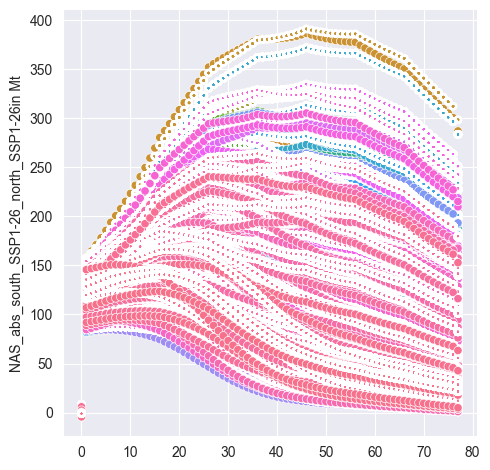

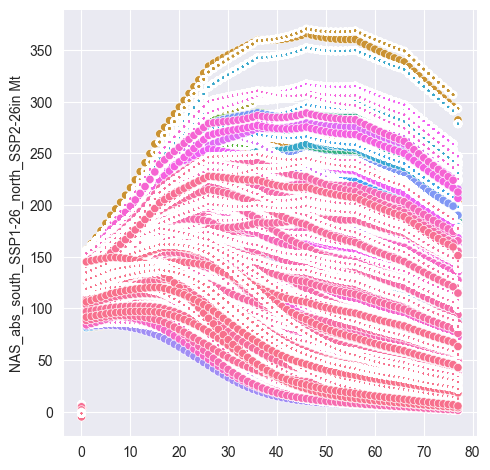

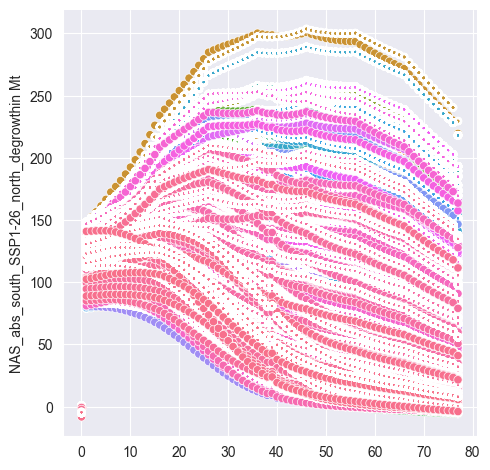

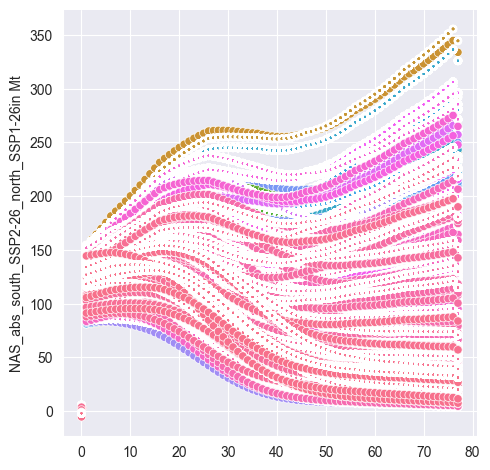

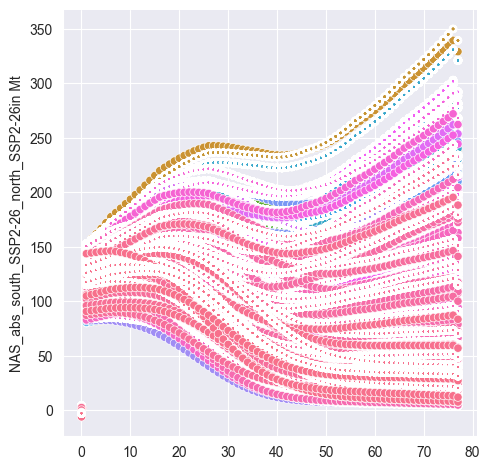

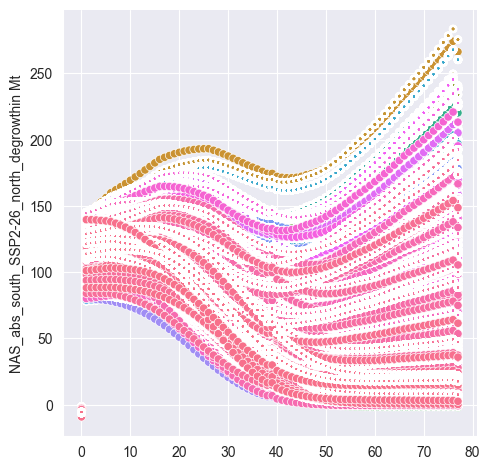

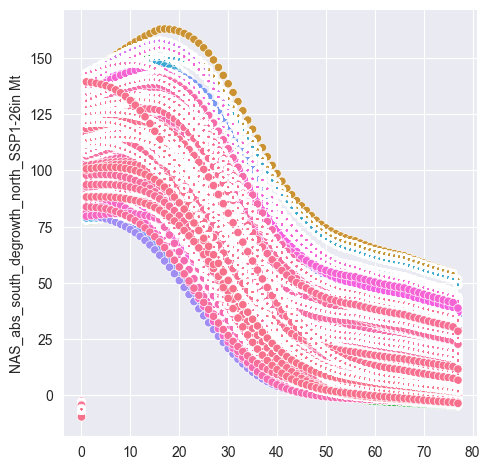

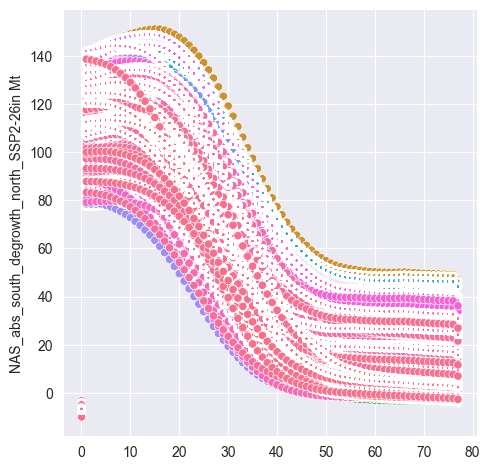

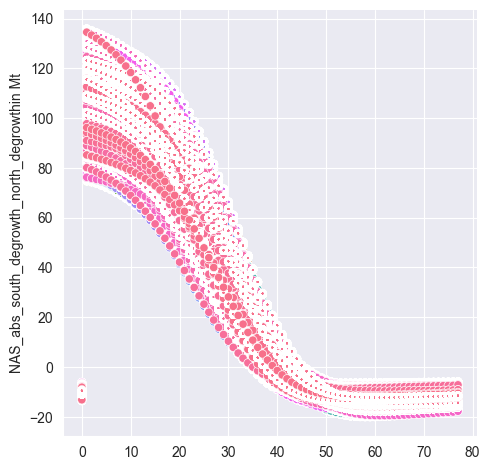

In [55]:
from ema_workbench.analysis.plotting import lines, Density

experiments_to_show = np.arange(0, experiments.shape[0], 1)

outcomes = np.nan_to_num(outcomes)
#fig, axes = plt.subplots(3, 3)

for i, outcome in enumerate(outcome_names):
    out_inter = pd.DataFrame(outcomes[outcome].T)

    sns.relplot(data=out_inter, legend= False )

    #row = i // 3
    #col = i % 3
    plt.ylabel('NAS_abs_'+f"{outcome}"+'in Mt')
    plt.savefig('NAS_abs_'+f"{outcome}"+'in Mt')
    plt.show()

Conclusions to draw:


In th general outcomes the row are the experiments and t are the timesteps.

the values are the NAS cum.

Wer are now interested how the NAS cum are distributed per timestep. to get a cumulative distribution of

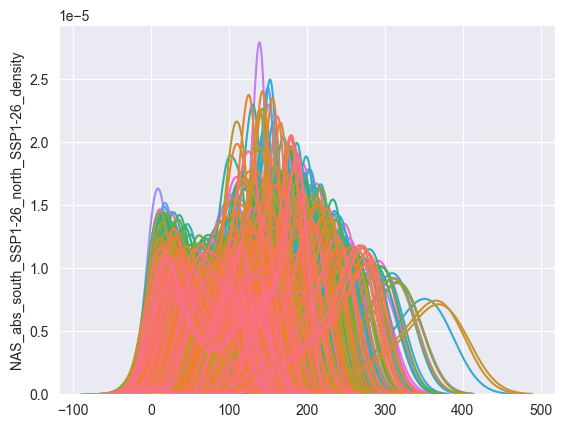

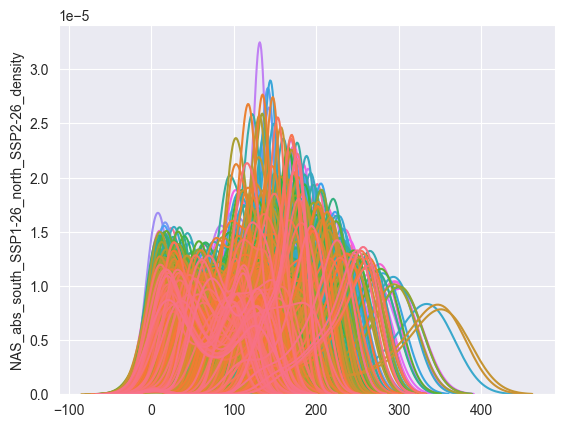

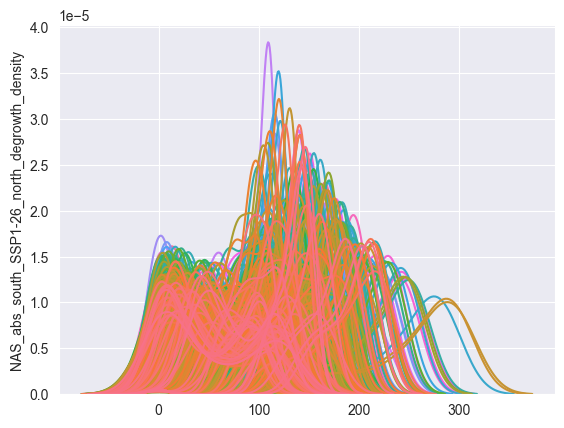

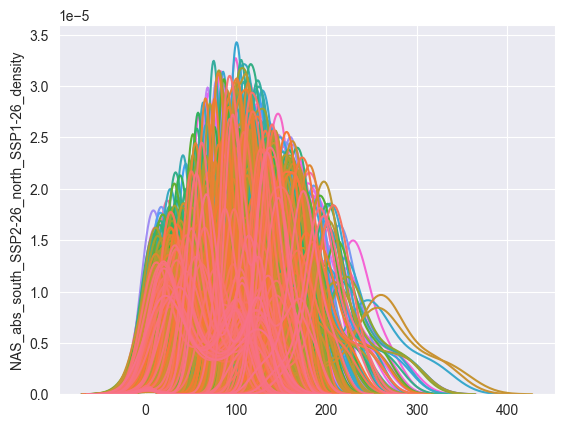

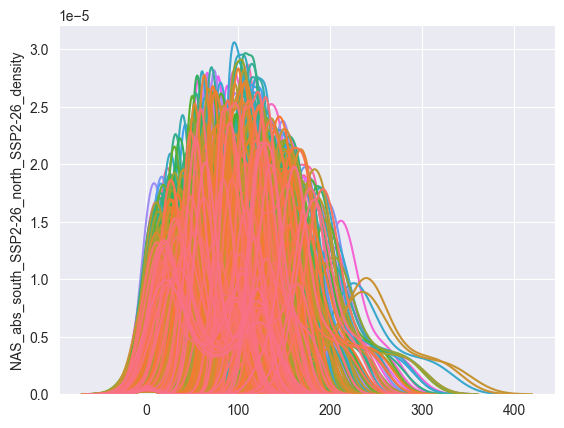

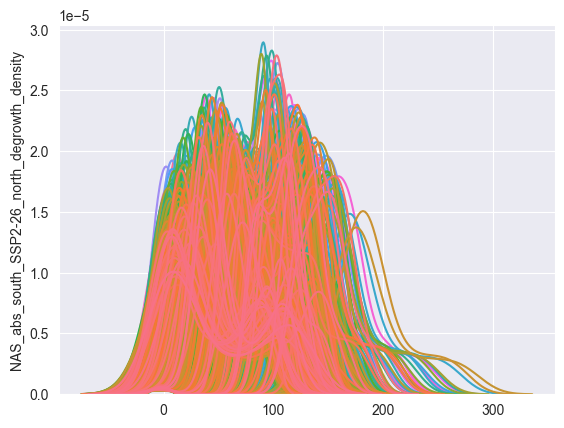

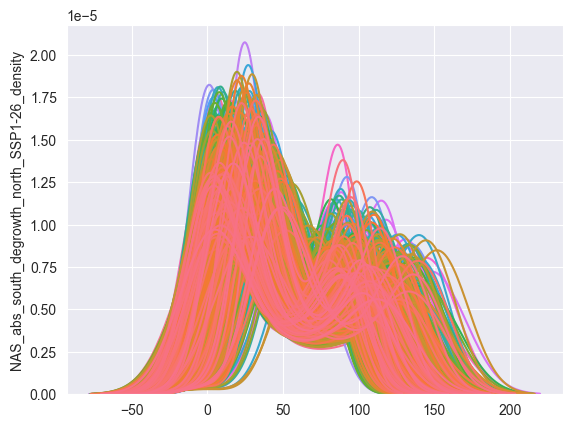

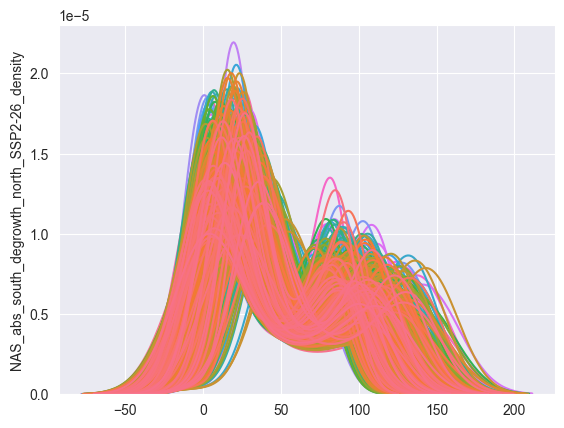

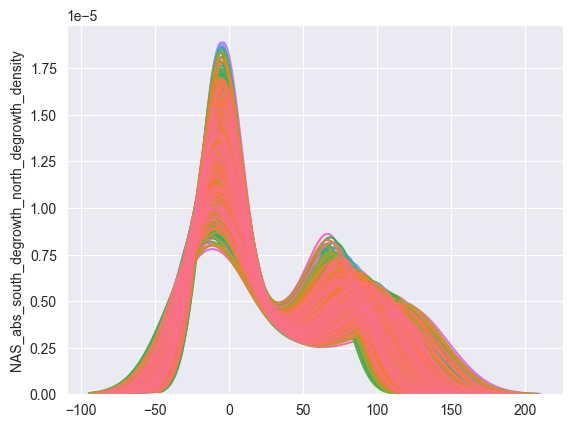

In [57]:
for i, outcome in enumerate(outcome_names):
    out_inter = pd.DataFrame(outcomes[outcome].T)

    sns.kdeplot(data=out_inter, legend= False )

    #row = i // 3
    #col = i % 3
    plt.ylabel('NAS_abs_'+f"{outcome}"+'_density')
    plt.savefig('NAS_abs_'+f"{outcome}"+'_density')
    plt.show()

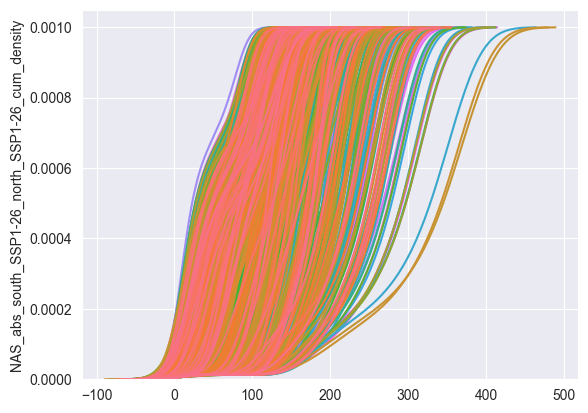

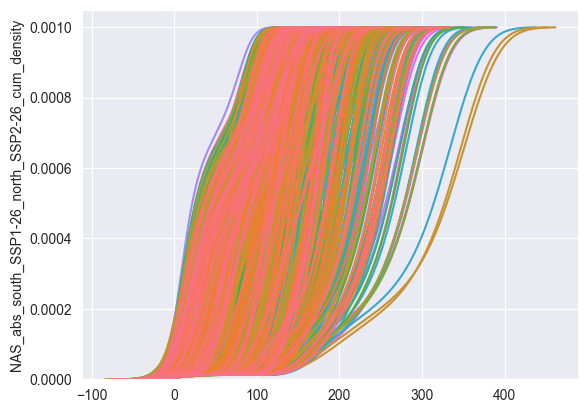

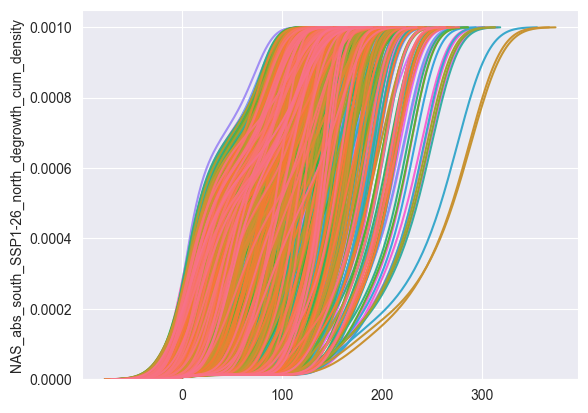

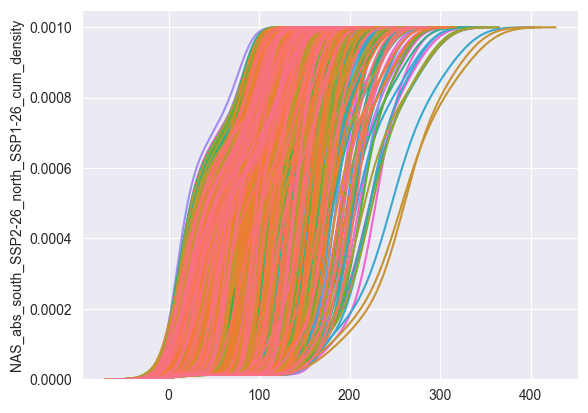

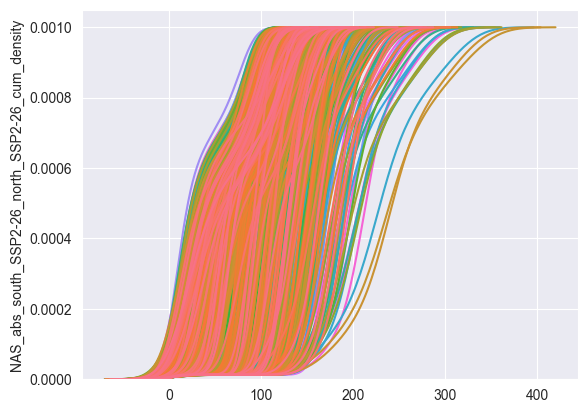

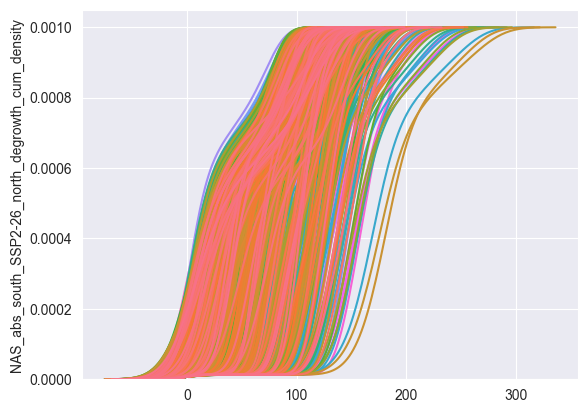

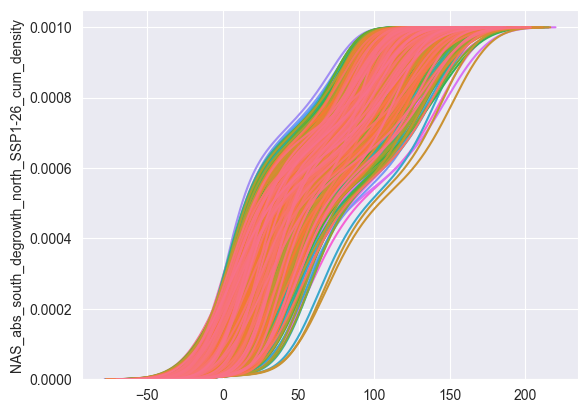

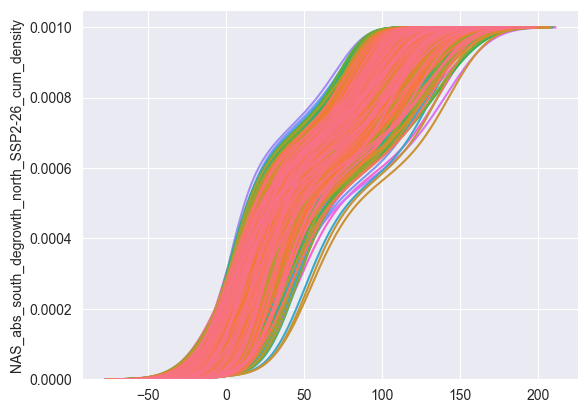

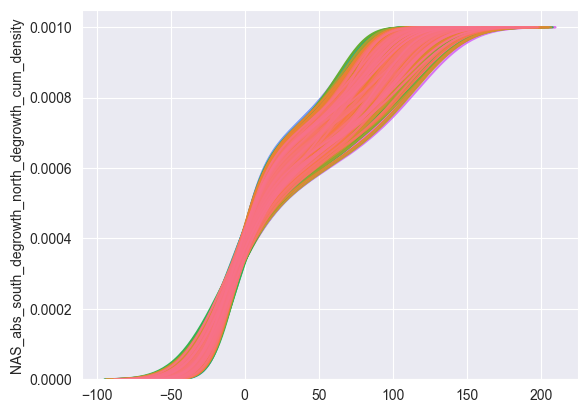

In [60]:
for i, outcome in enumerate(outcome_names):
    out_inter = pd.DataFrame(outcomes[outcome].T)

    sns.kdeplot(data=out_inter,cumulative=True, legend= False )

    #row = i // 3
    #col = i % 3
    plt.ylabel('NAS_abs_'+f"{outcome}"+'_cum_density')
    plt.savefig('NAS_abs_'+f"{outcome}"+'_cum_density')
    plt.show()

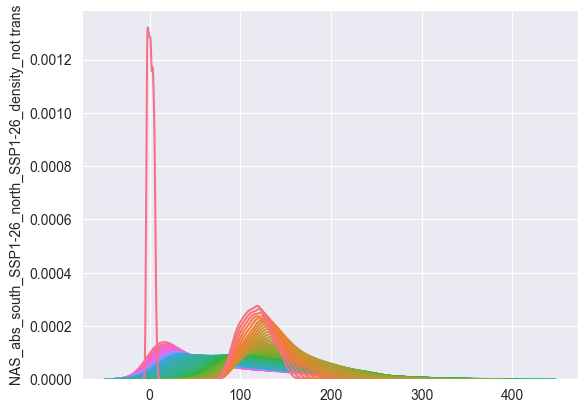

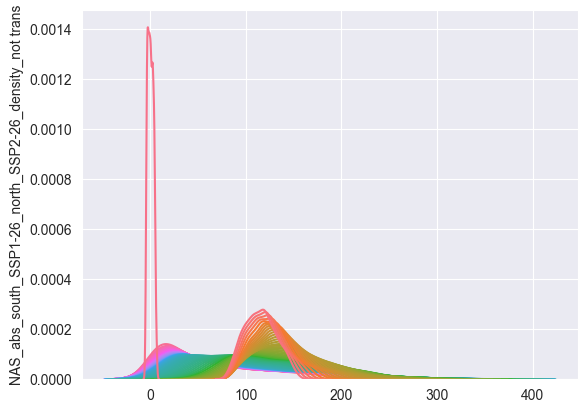

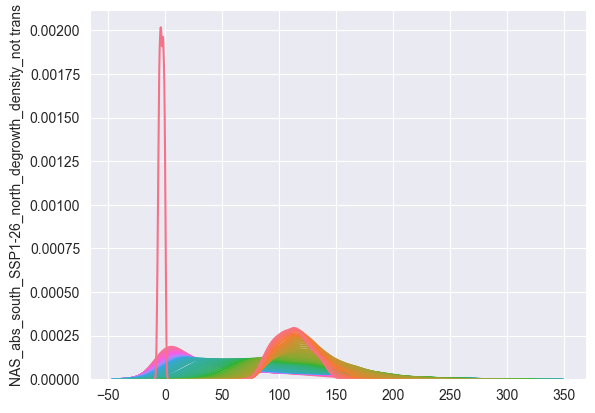

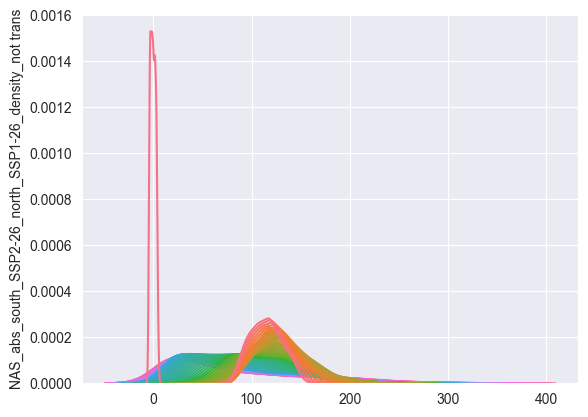

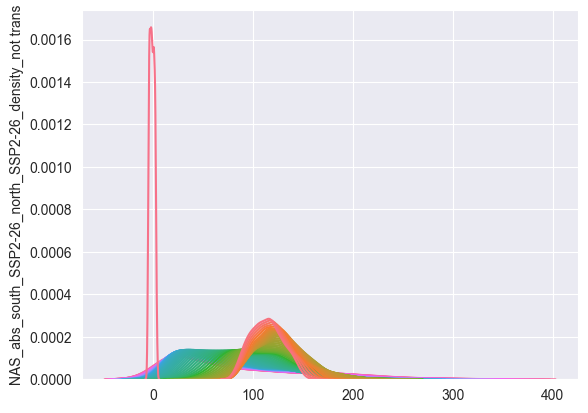

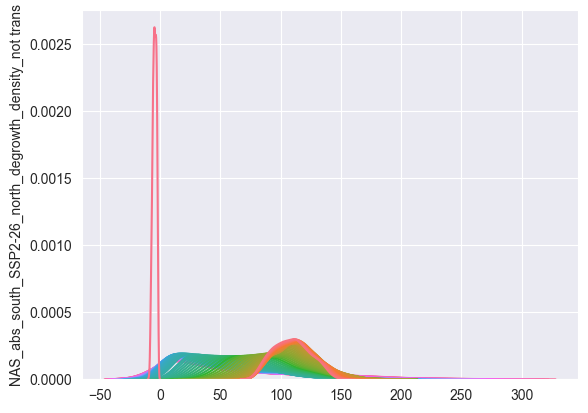

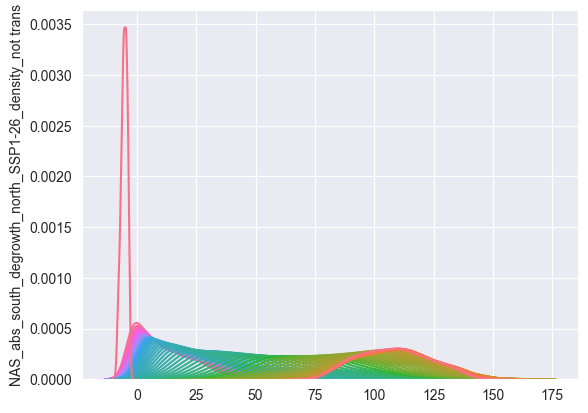

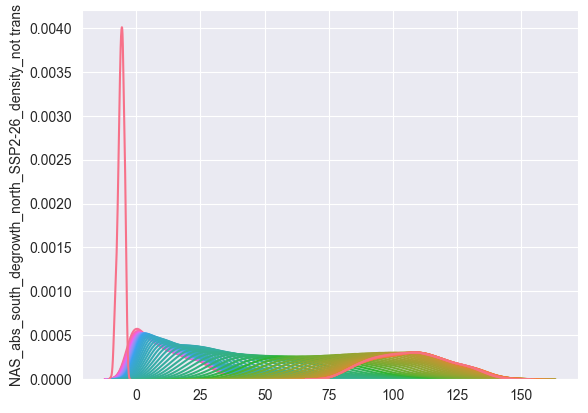

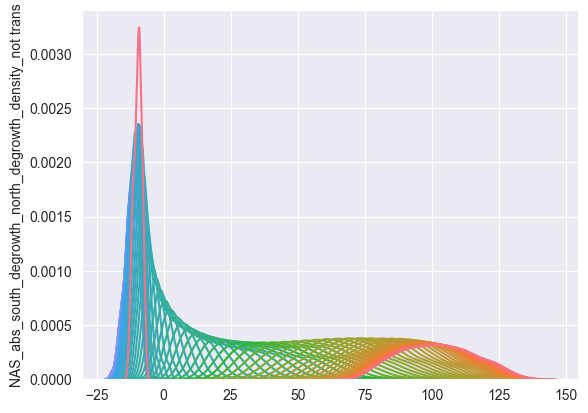

In [65]:
for i, outcome in enumerate(outcome_names):
    out_inter = pd.DataFrame(outcomes[outcome])

    sns.kdeplot(data=out_inter,common_norm=True, legend= False)

    #row = i // 3
    #col = i % 3
    plt.ylabel('NAS_abs_'+f"{outcome}"+'_density_not trans')
    plt.savefig('NAS_abs_'+f"{outcome}"+'_density_not trans')
    plt.show()

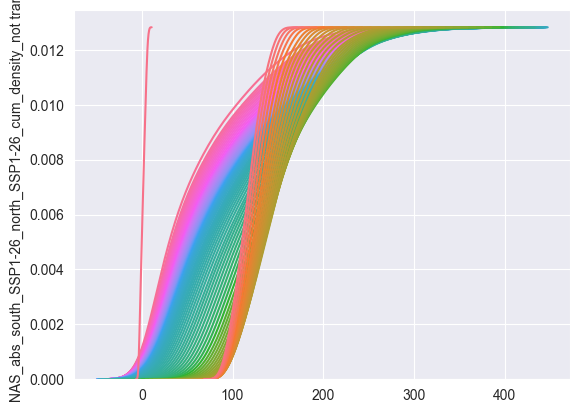

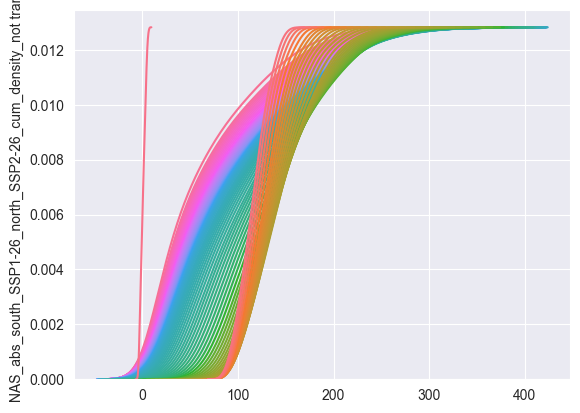

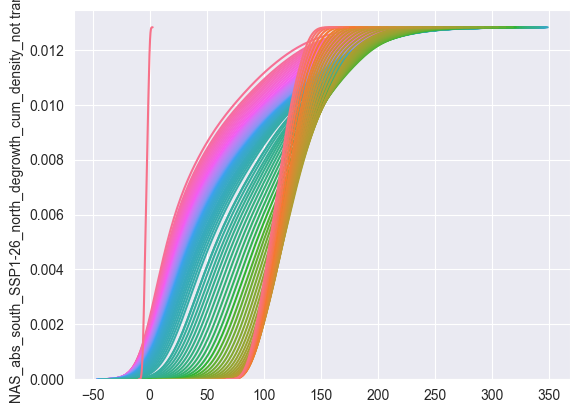

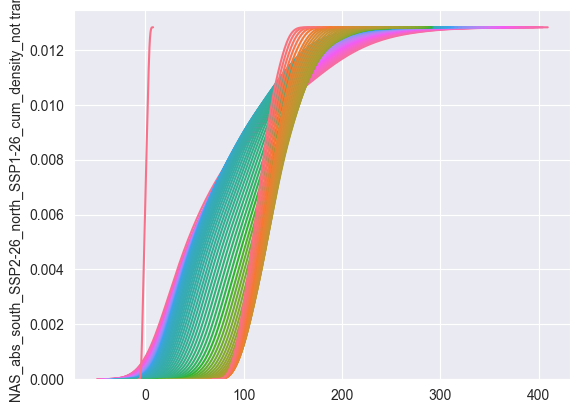

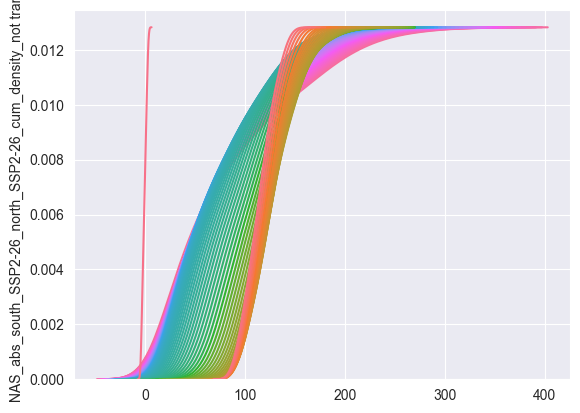

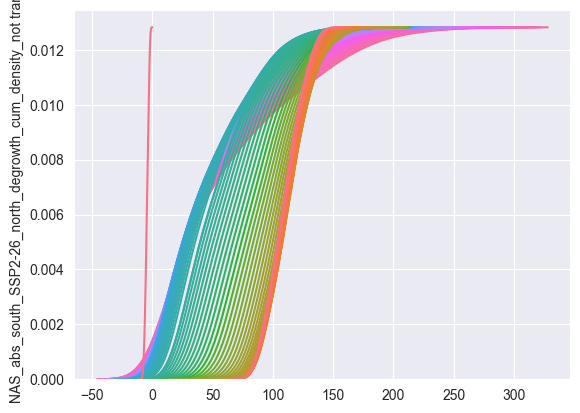

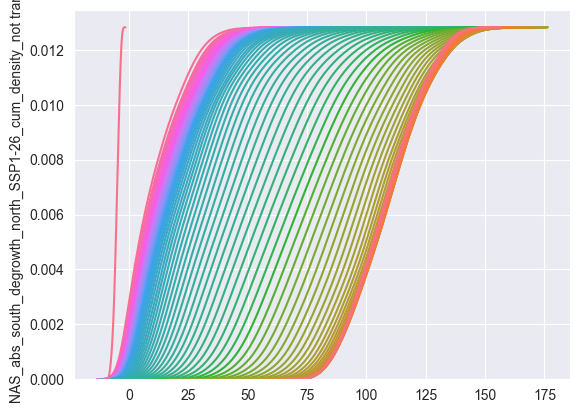

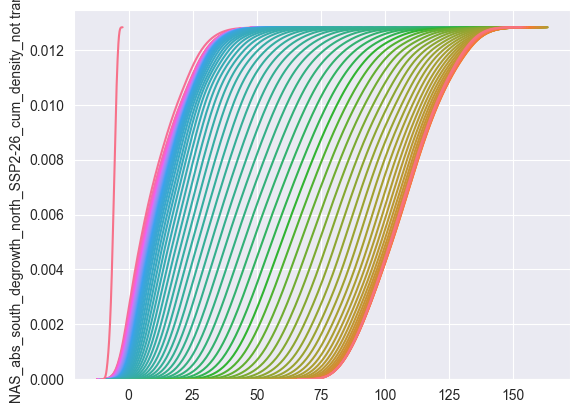

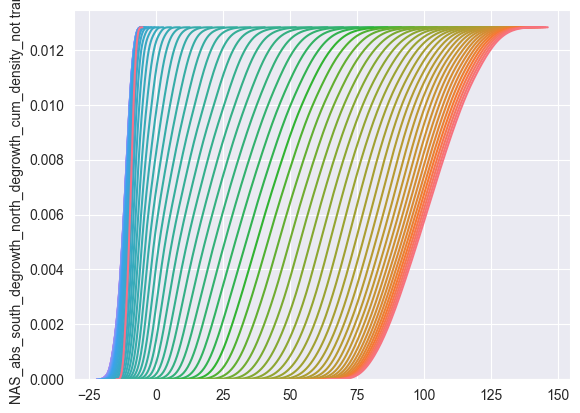

In [64]:
for i, outcome in enumerate(outcome_names):
    out_inter = pd.DataFrame(outcomes[outcome])

    sns.kdeplot(data=out_inter, legend= False, cumulative=True)

    #row = i // 3
    #col = i % 3
    plt.ylabel('NAS_abs_'+f"{outcome}"+'_cum_density_not trans')
    plt.savefig('NAS_abs_'+f"{outcome}"+'_cum_density_not trans')
    plt.show()

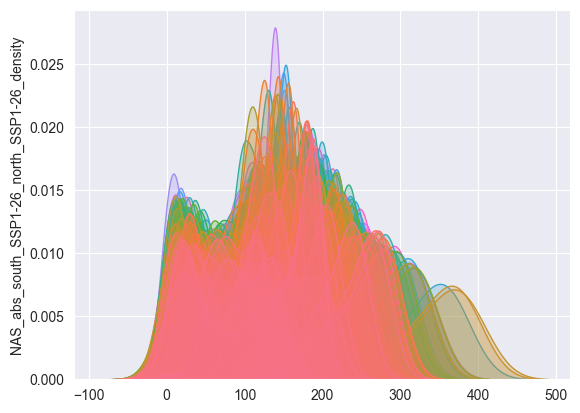

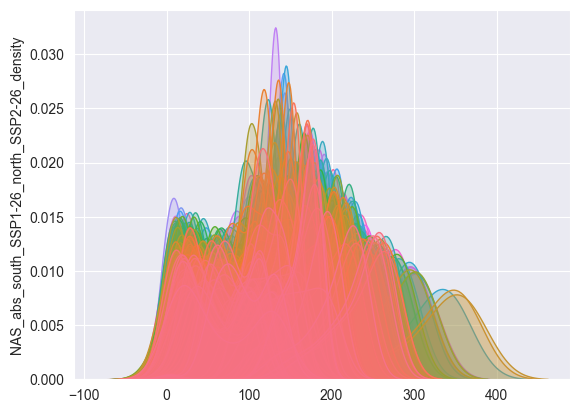

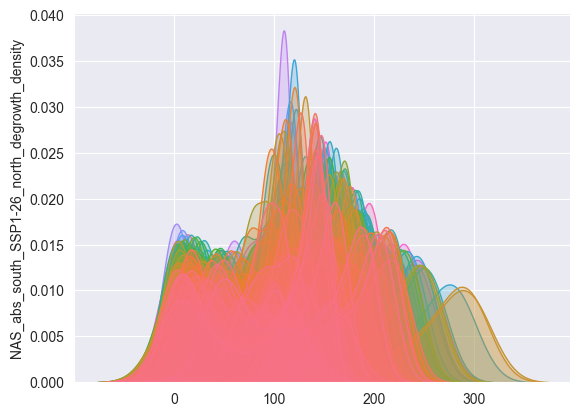

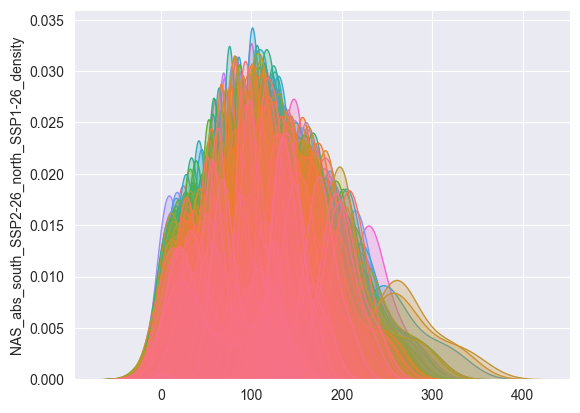

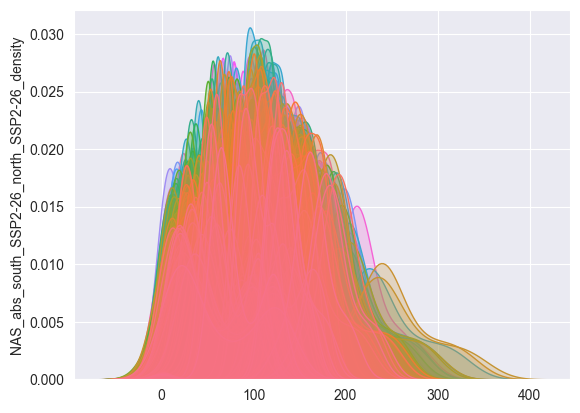

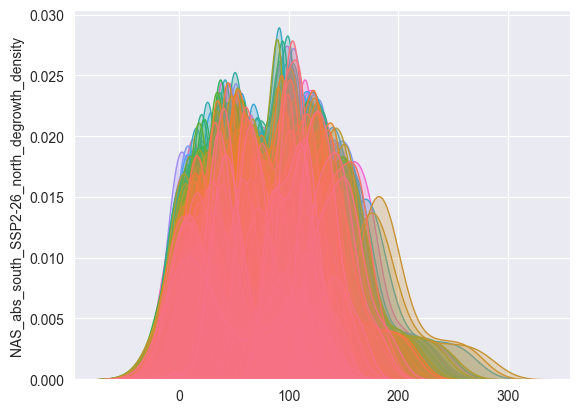

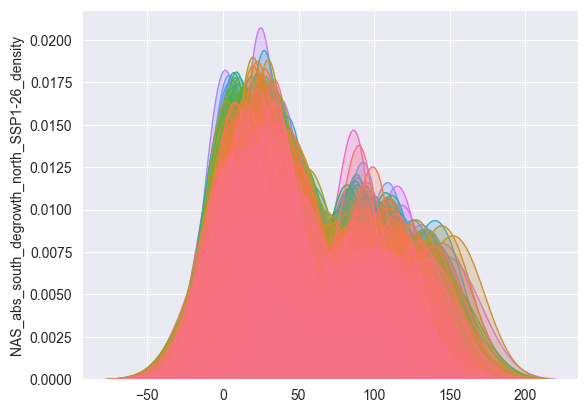

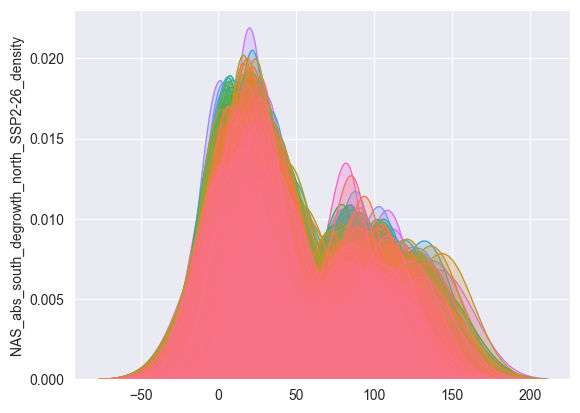

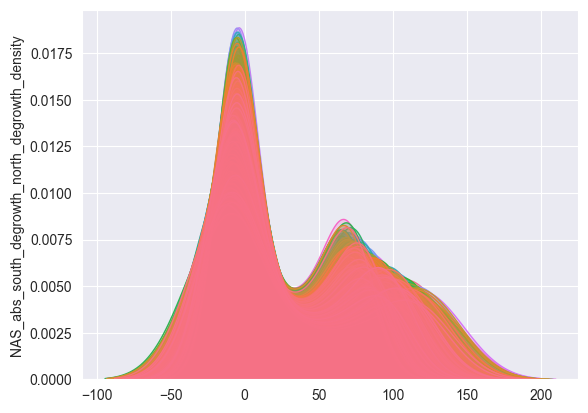

In [66]:
for i, outcome in enumerate(outcome_names):
    out_inter = pd.DataFrame(outcomes[outcome].T)

    sns.kdeplot(data=out_inter,fill=True, common_norm=False, legend= False )

    #row = i // 3
    #col = i % 3
    plt.ylabel('NAS_abs_'+f"{outcome}"+'_density')
    plt.savefig('NAS_abs_'+f"{outcome}"+'_density_fill')
    plt.show()

Lets analyse some of this graphs:
1. For almost all combinations we see bimodal kernel density functions which indicates that there are two attractor states of NAS_abs where a lot of the system states are attracted.
2. Especially degrowth in the south shifts the kernel density maximum towares values of 0 whereas degrowth in the north has not an comparable decisive effect.
3. Unarguably the highest density is observed for the case where both aggregates degrow with a maximum aroun -20.

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

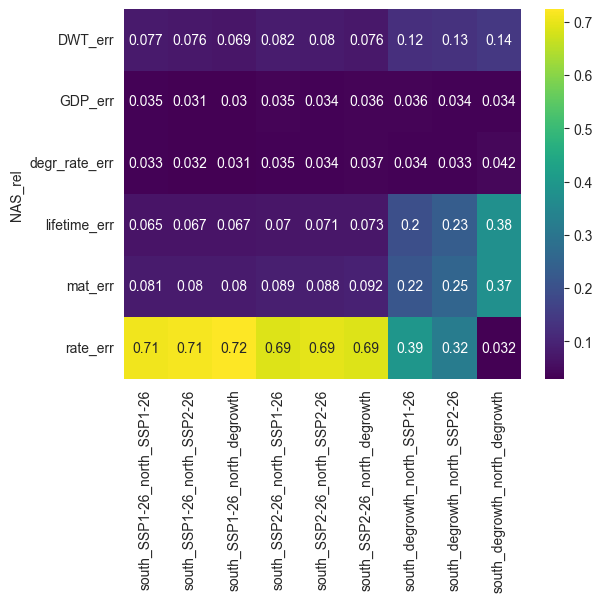

In [59]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.savefig('Feature_scoring_NAS_abs')
plt.ylabel('NAS_rel')
plt.show()

Insights into the system:
1. The rate_err has unagruably the highest impact on the system.
2. However for the _north_degrowth scenarios sth. strange happens. The contribution is quite low and the importance is more equally distributed over the other uncertainty parameters.

### KDE explanation for interpretation of results:

In statistics, kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation, i.e., a non-parametric method to estimate the probability density function of a random variable based on kernels as weights. KDE answers a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form.[1][2] One of the famous applications of kernel density estimation is in estimating the class-conditional marginal densities of data when using a naive Bayes classifier,[3][4] which can improve its prediction accuracy.[3] Scource: <https://en.wikipedia.org/wiki/Kernel_density_estimation>